<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خداحافظی با نویز
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا با استفاده از فیلترهای میانگین گیری و میانه یک تصویر که حاوی نویز می باشد را هموار کنیم و تا حد امکان نویز آنرا حذف کنیم.
</font>
</p>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول: فیلتر میانگین و میانه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش قصد داریم تا با استفاده از فیلتر میانگین و میانه هموارسازی را انجام دهیم و تاثیر پارامترهای هر فیلتر را بررسی کنیم.
</font>
</p>

---


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن عکس
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را که در پوشه Data قرار دارد به شکل خاکستری وارد کنید.
    <br>
    Characters Test Pattern.tif
</font>
</p>

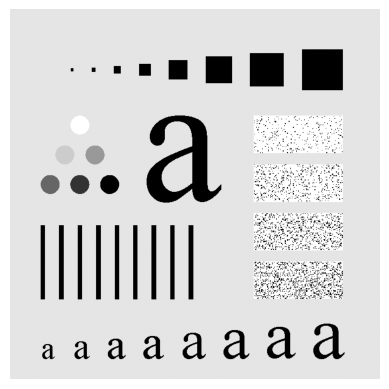

In [66]:
img = cv2.imread("./Data/Characters Test Pattern.tif", cv2.IMREAD_GRAYSCALE)

plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: نویزی کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول زیر یک تابع نوشته شده است. اگر به این تابع یک تصویر را به عنوان ورودی بدهید، این تابع روی تصویر نویزی به نام <b>فلفل نمک</b> اعمال می‌کند.
    <br>
ورودی تابع یک تصویر خاکستری است و پارامتر دوم آن درصد نویز وارد شده به تصویر را نشان می‌دهد. 
    <br>
این تابع را بر روی تصویر ورودی اعمال کنید. میزان نویز را 15 درصد در نظر بگیرید.
</font>
</p>

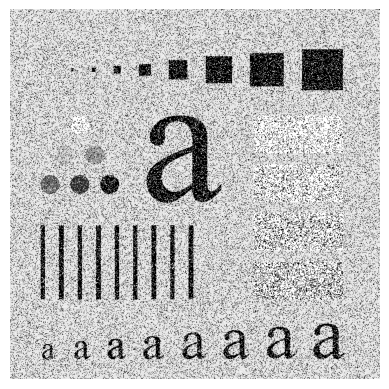

In [67]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image


noisy_image = add_salt_pepper_noise(img, 15)
plt.axis("off")
plt.imshow(noisy_image, cmap="gray")
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: هموارسازی با استفاده از میانگین‌گیری
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با استفاده از فیلتر میانگین‌گیری با اندازه‌های کرنل داده شده، تصویر را هموارسازی کنید.
</font>
</p>

$${kernel size} = (3, 3) $$
$${kernel size} = (5, 5) $$
$${kernel size} = (7, 7) $$

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
خروجی فیلتری که بیشترین PSNR را دارد با نام زیر ذخیره کنید. توجه کنید که حتما تصویر را به شکل RGB ذخیره کنید.
    <br>
    best_avg_characters_test_pattern.tif
</font>
</p>

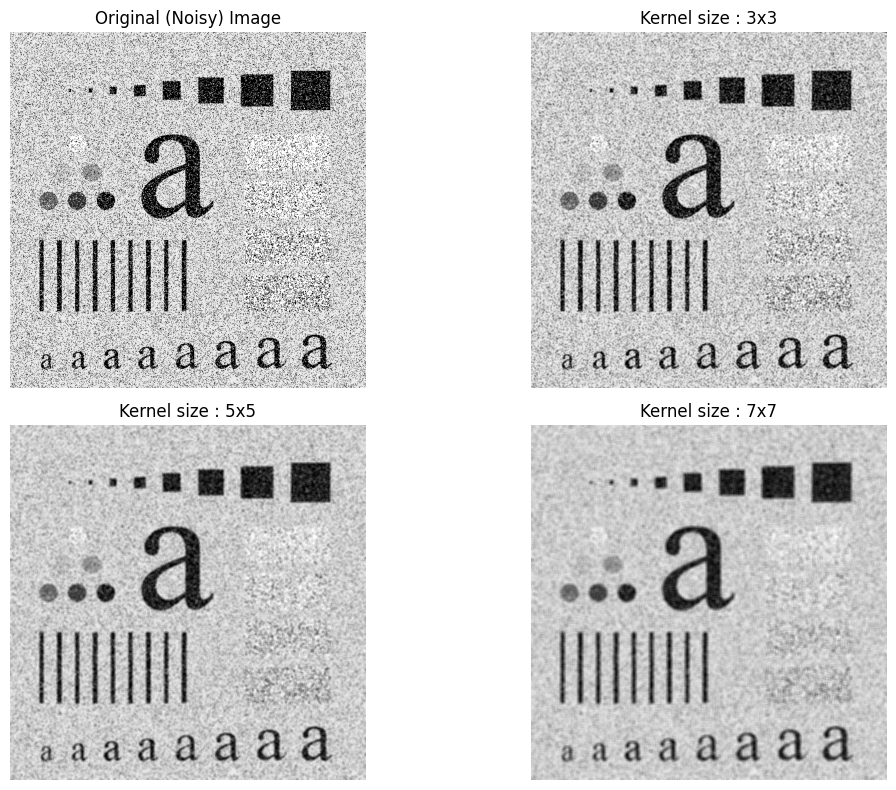

In [68]:
blur_3_by_3 = cv2.blur(noisy_image, (3, 3))
blur_5_by_5 = cv2.blur(noisy_image, (5, 5))
blur_7_by_7 = cv2.blur(noisy_image, (7, 7))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original (Noisy) Image")
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Kernel size : 3x3")
plt.imshow(blur_3_by_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Kernel size : 5x5")
plt.imshow(blur_5_by_5, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Kernel size : 7x7")
plt.imshow(blur_7_by_7, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


psnr_3_by_3 = cv2.PSNR(img, blur_3_by_3)
psnr_5_by_5 = cv2.PSNR(img, blur_5_by_5)
psnr_7_by_7 = cv2.PSNR(img, blur_7_by_7)

psnrs = zip(
    [psnr_3_by_3, psnr_5_by_5, psnr_7_by_7], [blur_3_by_3, blur_5_by_5, blur_7_by_7]
)

max_psnr = max([psnr_3_by_3, psnr_5_by_5, psnr_7_by_7])

for psnr, image in psnrs:
    if psnr == max_psnr:
        cv2.imwrite(
            "best_avg_characters_test_pattern.tif",
            cv2.cvtColor(image, cv2.COLOR_GRAY2RGB),
        )

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: هموارسازی با استفاده از فیلتر میانه
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با استفاده از فیلتر میانه به ابعاد زیر هموارسازی را انجام دهید.
</font>
</p>

$${kernel size} = (3, 3) $$
$${kernel size} = (5, 5) $$
$${kernel size} = (7, 7) $$

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
تصویر خروجی هر فیلتر را بررسی کنید. به ازای هر تصویر PSNR را نسبت به تصویر اولیه بدون نویز بدست آورید.
    <br>
    تصویری که بیشترین PSNR دارد را با نام فایل زیر ذخیره کنید.
    <br>
    best_median_characters_test_pattern.tif
</font>
</p>

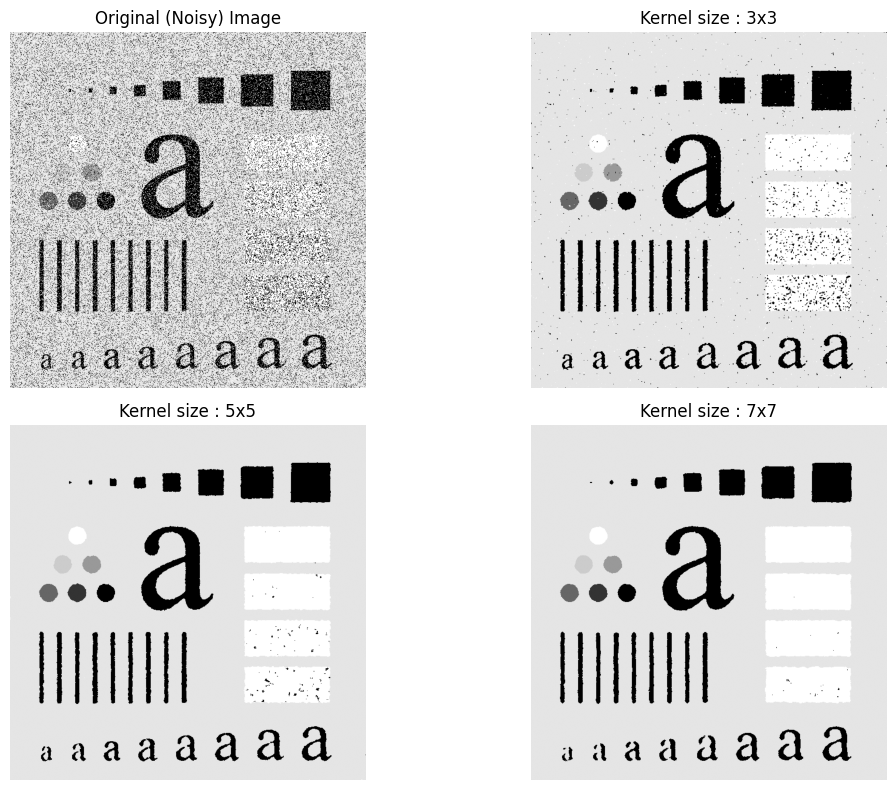

In [69]:
median_3_by_3 = cv2.medianBlur(noisy_image, 3)
median_5_by_5 = cv2.medianBlur(noisy_image, 5)
median_7_by_7 = cv2.medianBlur(noisy_image, 7)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original (Noisy) Image")
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Kernel size : 3x3")
plt.imshow(median_3_by_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Kernel size : 5x5")
plt.imshow(median_5_by_5, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Kernel size : 7x7")
plt.imshow(median_7_by_7, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


psnr_3_by_3 = cv2.PSNR(img, median_3_by_3)
psnr_5_by_5 = cv2.PSNR(img, median_5_by_5)
psnr_7_by_7 = cv2.PSNR(img, median_7_by_7)

psnrs = zip(
    [psnr_3_by_3, psnr_5_by_5, psnr_7_by_7],
    [median_3_by_3, median_5_by_5, median_7_by_7],
)

max_psnr = max([psnr_3_by_3, psnr_5_by_5, psnr_7_by_7])

for psnr, image in psnrs:
    if psnr == max_psnr:
        cv2.imwrite(
            "best_median_characters_test_pattern.tif",
            cv2.cvtColor(image, cv2.COLOR_GRAY2RGB),
        )

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم: فیلتر گوسی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش قصد داریم تا یک فیلتر گوسی را با پارامترهای مختلف بررسی کنیم و تاثیر آنها را مشاهده کنیم.
</font>
</p>

---

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را که در پوشه Data قرار دارد به شکل خاکستری وارد کنید.
    <br>
    cameraman.tif
</font>
</p>

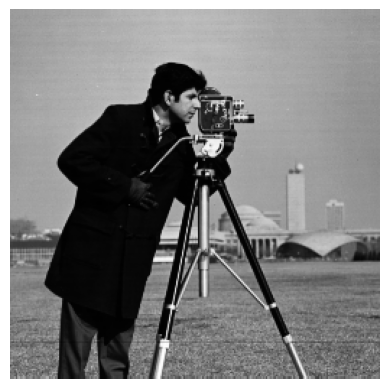

In [70]:
img = cv2.imread("./Data/cameraman.tif", cv2.IMREAD_GRAYSCALE)

plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: اعمال نویز گوسی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 از در این مرحله قصد داریم تا با استفاده از تابعی که در سلول زیر تعریف شده است، روی تصویر خود نویز گوسی را اعمال کنیم. این تابع تصویر شما به همراه میانگین و انحراف معیار دریافت می‌کند. خروجی این تابع تصویری است که حاوی نویز گوسی است. 
    <br>
    تصویر ورودی را به این تابع بدهید. همچنین سایر پارامترهای انرا به شکل زیر مقداردهی کنید.
</font>
</p>


$${mean} = 0 $$
$${\sigma} = 20 $$

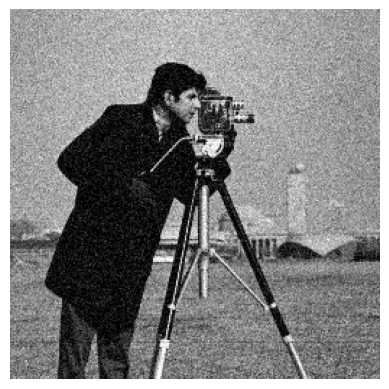

In [71]:
def add_gaussian_noise(img, mean, sigma):
    noise = np.random.normal(mean, sigma, img.shape).astype(np.int16)
    noisy_img = img.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

noisy_image = add_gaussian_noise(img, 0, 20)

plt.axis("off")
plt.imshow(noisy_image, cmap="gray")
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: اعمال فیلتر گوسی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال در جهت کاهش نویز و افزایش کیفیت تصویر می‌خواهیم که از فیلتر گوسی جهت هموار سازی استفاده کنیم. این فیلتر دو پارامتر مهم دارد. سایز هسته و انحراف معیار. در این بخش هسته‌ها همگی 3x3 هستند.
    <br>
    اما این فیلتر را به ازای انحراف معیارهای متفاوت بررسی خواهیم کرد. فیلترهایی با انحراف معیار زیر بسازید و روی تصویر نویزی مرحله قبل اعمال کنید.
</font>
</p>

$${\sigma} = 0.5 $$
$${\sigma} = 1.5 $$
$${\sigma} = 3.0 $$
$${\sigma} = 5.0 $$

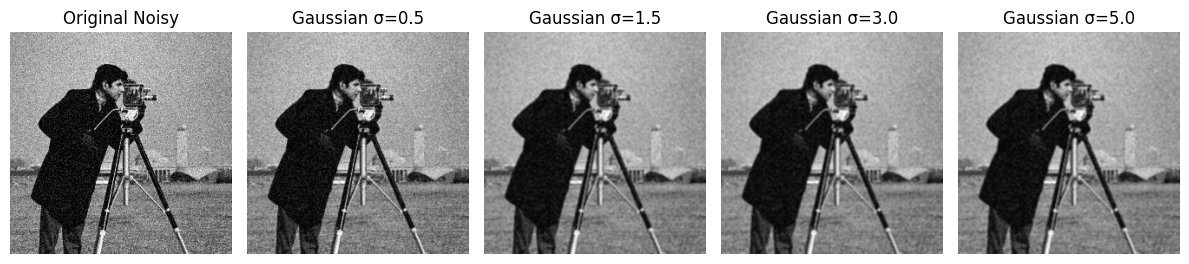

In [72]:
sigma_0_5 = cv2.GaussianBlur(noisy_image, (3, 3), 0.5)
sigma_1_5 = cv2.GaussianBlur(noisy_image, (3, 3), 1.5)
sigma_3_0 = cv2.GaussianBlur(noisy_image, (3, 3), 3.0)
sigma_5_0 = cv2.GaussianBlur(noisy_image, (3, 3), 5.0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
plt.imshow(noisy_image, cmap="gray")
plt.title("Original Noisy")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(sigma_0_5, cmap="gray")
plt.title("Gaussian σ=0.5")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(sigma_1_5, cmap="gray")
plt.title("Gaussian σ=1.5")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(sigma_3_0, cmap="gray")
plt.title("Gaussian σ=3.0")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(sigma_5_0, cmap="gray")
plt.title("Gaussian σ=5.0")
plt.axis("off")

plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: ذخیره‌سازی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا به ازای تصاویر خروجی فیلتر گوسی، PSNR هر کدام نسبت به تصویر اولیه بدون نویز را بدست آورید.
    <br>
    سپس تصویری که بیشترین PSNR دارد را ذخیره کنید. دقت کنید که تصویر را بصورت RGB ذخیره کنید.
    <br>
    best_gaussian_cameraman.tif
</font>
</p>

In [73]:
psnr_0_5 = cv2.PSNR(img, sigma_0_5)
psnr_1_5 = cv2.PSNR(img, sigma_1_5)
psnr_3_0 = cv2.PSNR(img, sigma_3_0)
psnr_5_0 = cv2.PSNR(img, sigma_5_0)

psnrs = zip([psnr_0_5, psnr_1_5, psnr_3_0, psnr_5_0], [sigma_0_5, sigma_1_5, sigma_3_0, sigma_5_0])

max_psnr = max([psnr_0_5, psnr_1_5, psnr_3_0, psnr_5_0])

for psnr, image in psnrs:
    if psnr == max_psnr:
        cv2.imwrite(
            "best_gaussian_cameraman.tif",
            cv2.cvtColor(image, cv2.COLOR_GRAY2RGB),
        )

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [64]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "best_avg_characters_test_pattern.tif", "best_median_characters_test_pattern.tif", "best_gaussian_cameraman.tif"]
compress(file_names)

File Paths:
['notebook.ipynb', 'best_avg_characters_test_pattern.tif', 'best_median_characters_test_pattern.tif', 'best_gaussian_cameraman.tif']
